## Домашнее задание к занятию «Поиск выбросов и генерация новых признаков»

### Задание

<b>Цель:</b><br>Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.<p>
<b>Описание задания:</b><br>
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с <a href="https://www.kaggle.com/uciml/glass" target="_blank">сайта</a>. 
Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. 
Датасет нужно исследовать на наличие выбросов, провести EDA.

<b>Этапы работы:</b>
1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
2. Проведите первичный анализ.<br>
а) Проверьте количество записей для каждого класса. Сделайте вывод.
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
4. Обучите модель дерева решений <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">RandomForestClassifier</a> на обучающем множестве.
5. Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).
6. Обработайте выбросы в данных.<br>
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" target="_blank">sns.boxplot</a>, <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html" target="_blank">sns.distplot.</a>. 
Есть ли признаки с нормальным распределением?<br>
b) Исследуйте признаки на выбросы несколькими способами.<br>
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.<br>
7. Повторите п. 4, п. 5.
8. Сформулируйте выводы по проделанной работе.<br>
а) Кратко опишите, какие преобразования были сделаны с данными.<br>
b) Сравните точность двух моделей.<br>
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.<p>
Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и 
построены две модели: «до» и «после» обработки экстремальных значений.

<b>Результат:</b>
Получены практические знания по работе с выбросами в данных.
<p>

<b>Форма выполнения:</b>
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb<p>

   
<b>Инструменты:</b>
- Jupyter Notebook/Google Colab;
- GitHub;
- <a href="https://www.kaggle.com/uciml/glass" target="_blank">сайт</a> с данными для обучения моделей;
- модель дерева решений <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">RandomForestClassifier.</a>.
    
<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, 
чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

____

### Решение

> #### Получите данные и загрузите их в рабочую среду

In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [67]:
data = pd.read_csv('glass.csv')
print(data.shape)
data.head()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


* Пропуски отсутствуют

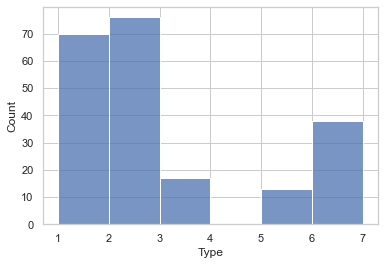

In [69]:
sns.histplot(data=data, x='Type', binwidth=1)
plt.show()

* 2 и 1 типы стекла чаще встречаются в данных
* В данных 7 типов стекла, 4 - отсутсвует, если он в дальнейшем появиться, то нужно будет переобучать модели

In [70]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


* Вывод:
Мы видим, что большинство записей относится к классам 1 и 2, в то время как в других классах записей меньше. Это потенциально может привести к несбалансированным результатам классификации, когда модель лучше работает с классами большинства и хуже с классами меньшинства.

> #### Подготавливаем датасет к обучению моделей

* Обратим внимание на Ba и Fe.
ниже две формулы, которые показали что есть типы у которых отсутствуют данные, т.е. = 0, это 6 тип, и что превалируют 0 над другими значениями. Я решил перекодировать эти два параметра в 0 и 1, т.е. либо есть, либо нет.

In [71]:
data['Ba'].groupby(data['Type']).value_counts()

Type  Ba  
1     0.00    67
      0.09     1
      0.11     1
      0.69     1
2     0.00    70
      0.06     1
      0.09     1
      0.11     1
      0.14     1
      0.27     1
      3.15     1
3     0.00    16
      0.15     1
5     0.00    11
      0.24     1
      2.20     1
6     0.00     9
7     0.00     3
      0.64     2
      1.57     2
      1.59     2
      0.40     1
      0.53     1
      0.54     1
      0.56     1
      0.61     1
      0.63     1
      0.66     1
      0.67     1
      0.76     1
      0.81     1
      1.06     1
      1.19     1
      1.38     1
      1.55     1
      1.63     1
      1.64     1
      1.67     1
      1.68     1
      1.71     1
      2.88     1
Name: Ba, dtype: int64

In [72]:
data['Fe'].groupby(data['Type']).value_counts()

Type  Fe  
1     0.00    45
      0.11     4
      0.16     3
      0.17     3
      0.24     3
      0.07     2
      0.03     1
      0.06     1
      0.09     1
      0.10     1
      0.14     1
      0.19     1
      0.22     1
      0.26     1
      0.30     1
      0.31     1
2     0.00    44
      0.10     3
      0.12     3
      0.17     3
      0.24     3
      0.09     2
      0.14     2
      0.15     2
      0.22     2
      0.28     2
      0.08     1
      0.18     1
      0.19     1
      0.20     1
      0.21     1
      0.25     1
      0.29     1
      0.32     1
      0.34     1
      0.35     1
3     0.00    12
      0.09     1
      0.10     1
      0.17     1
      0.24     1
      0.37     1
5     0.00    11
      0.28     1
      0.51     1
6     0.00     9
7     0.00    23
      0.09     2
      0.01     1
      0.05     1
      0.07     1
      0.08     1
Name: Fe, dtype: int64

In [73]:
# лямбда-функцию для кодирования значений
encode_func = lambda x: 1 if x != 0 else 0

# Применем функцию к выбранным показателям
data['Fe'] = data['Fe'].apply(encode_func)
data['Ba'] = data['Ba'].apply(encode_func)



In [74]:
# произведем Нормализацию данных перед использованием в Моделях, то есть приведем числовые переменные к диапазону от 0 до 1. (за исключением показаетелей, которые мы уже трансформировали)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
cols_to_scale = [col for col in data.columns if col not in ["Type", "Fe", "Ba"]]
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [75]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.177570,0.327103,2.780374
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.383046,0.470255,2.103739
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000,1.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,2.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


> #### Разделяем на тренировочные и тестовые данные (согласно условию: 80% данных оставить на обучающее множество, 20% - на тестовое)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X = data.drop(['Type'], axis = 1) 

y = data['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

> #### Обучим модель дерева решений RandomForestClassifier на обучающем множестве.

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 10, max_depth = 6)
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)

0.9707602339181286

In [80]:
# Для тестового множества предскажим тип стекла и сравним с истинным значением, посчитав точность предсказания модели (accuracy).
from sklearn.metrics import accuracy_score

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Вывод: Точность модели на тестовом наборе данных составляет: {accuracy:.1%} что означает, что модель правильно предсказала тип стекла для {accuracy:.1%} записей на тестовом наборе данных")


Вывод: Точность модели на тестовом наборе данных составляет: 62.8% что означает, что модель правильно предсказала тип стекла для 62.8% записей на тестовом наборе данных


> ####  Обработка выбросов

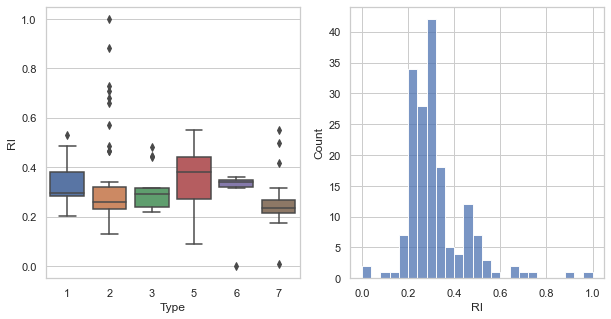

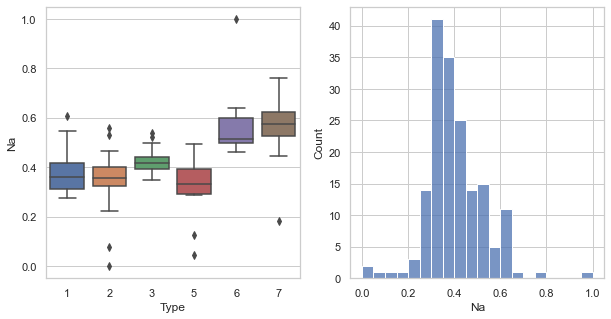

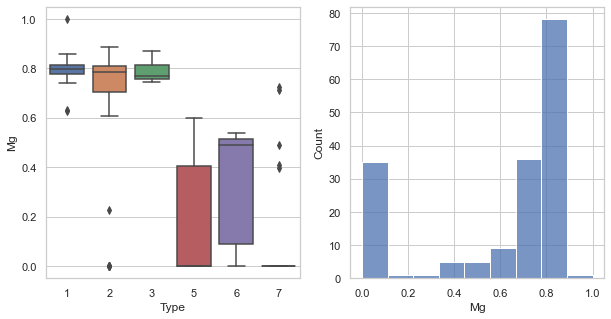

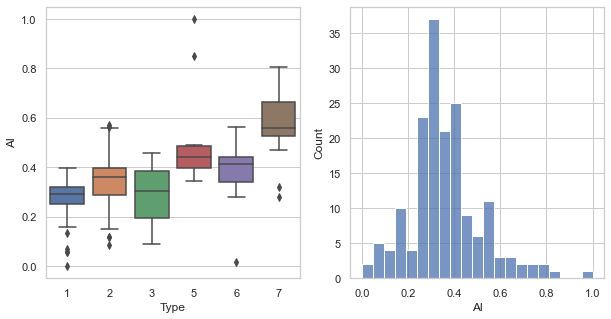

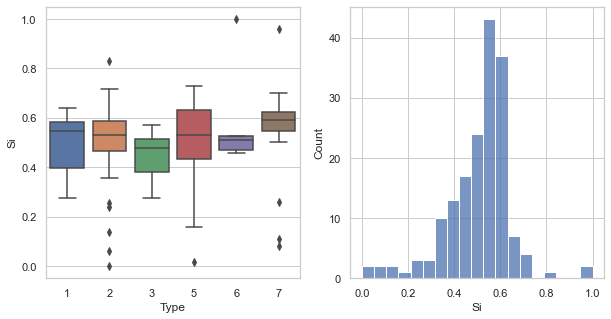

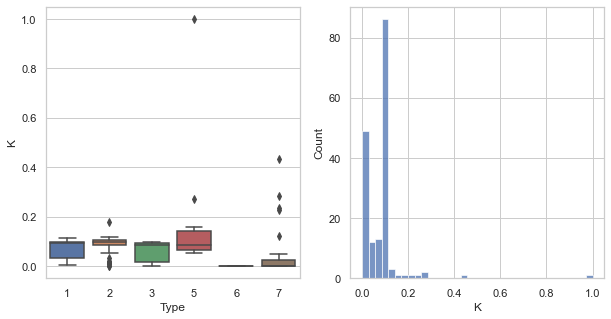

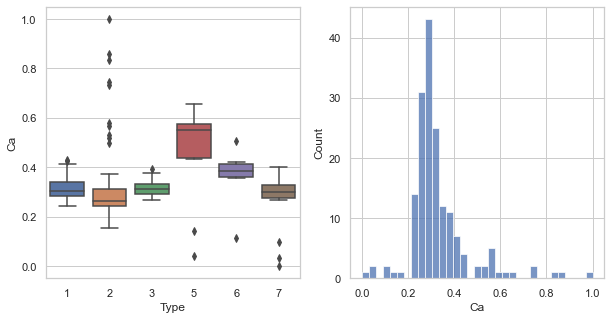

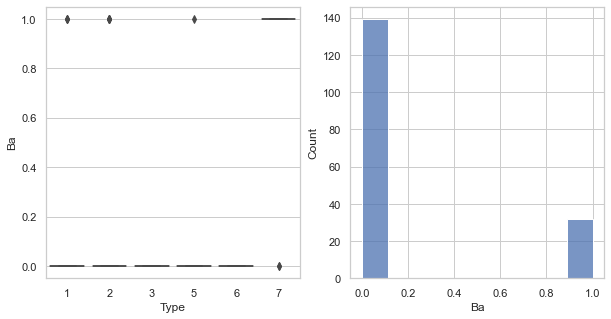

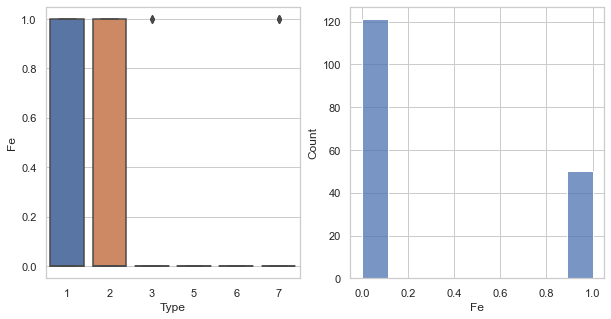

In [81]:
sns.set(style='whitegrid')
for feature in X_train.columns:
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.boxplot(x=y_train, y=X_train[feature], ax=ax[0])
    sns.histplot(X_train[feature], ax=ax[1])
    plt.show()


* Вывод: Из графиков мы видим, что большинство показателей не имеют нормального распределения. Показатели "RI", "NA" и "AI", по-видимому, имеют несколько нормальное распределение. <br>
Так же графикам мы видим предположительные выбросы, так же как и по ящикам с усами по каждому типу стекла наблюдаются предполагаемые выбросы.

> #### Удаляем выбросы несколькими методами

In [82]:
from scipy.stats import zscore, iqr

In [83]:
# Z-Score метод
z_scores = zscore(X)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_z = X[filtered_entries]
y_z = y[filtered_entries]



In [84]:
# выводим процент удаленных записей для каждого класса (z-scores)

total_counts = data['Type'].value_counts() 
filtered_counts = y_z.value_counts()
percent_removed = (1 - filtered_counts / total_counts) * 100
print(percent_removed)
y_z.shape

1     0.000000
2     9.210526
3     0.000000
5    23.076923
6    11.111111
7     6.896552
Name: Type, dtype: float64


(201,)

In [85]:
# выводим процент удаленных записей для каждого класса (IQR) Межквартильный диапазон

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

filtered_entries_iqr = ~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

X_iqr = X[filtered_entries_iqr]
y_iqr = y[filtered_entries_iqr]
filtered_counts_iqr = y_iqr.value_counts()
percent_removed_iqr = (1 - filtered_counts_iqr / total_counts) * 100
print(percent_removed_iqr)
y_iqr.shape

1    12.857143
2    22.368421
3     5.882353
5    84.615385
6    44.444444
7          NaN
Name: Type, dtype: float64


(143,)

In [86]:
# Isolation Forest
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_estimators = 100, random_state = 10, contamination = 0.05)

outliers_if = isf.fit_predict(X.values)
data_if = data[outliers_if == 1]
outliers_if = np.where(outliers_if == -1)[0]
outliers_percentage_if = len(outliers_if) / len(X) * 100
print(data.iloc[outliers_if]['Type'].value_counts(normalize = True) *100)
X_if = data_if.drop('Type', axis=1)
y_if = data_if['Type']
y_if.shape

2    36.363636
5    27.272727
7    27.272727
6     9.090909
Name: Type, dtype: float64


(203,)

In [87]:
# KNN
from sklearn.neighbors import LocalOutlierFactor

knn = LocalOutlierFactor(n_neighbors = 20)

outliers_knn = knn.fit_predict(X)
data_knn = data[outliers_knn == 1]
outliers_knn = np.where(outliers_knn == -1)[0]
outliers_percentage_knn = len(outliers_knn) / len(X) * 100

print(data.iloc[outliers_knn]['Type'].value_counts(normalize = True) * 100)

X_knn = data_knn.drop('Type', axis=1)
y_knn = data_knn['Type']
y_knn.shape

2    43.478261
1    15.217391
5    15.217391
6    13.043478
3     6.521739
7     6.521739
Name: Type, dtype: float64


(168,)

> #### Разделяем на тренировочные и тестовые данные (согласно условию: 80% данных оставить на обучающее множество, 20% - на тестовое) для всех моделей

In [88]:
 # Z-Score
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_z, y_z, test_size = 0.2, random_state = 10)
# IQR
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_iqr, y_iqr, test_size = 0.2, random_state = 10)
# Isolation Forest
X_train_if, X_test_if, y_train_if, y_test_if = train_test_split(X_if, y_if, test_size = 0.2, random_state = 10)
# KNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size = 0.2, random_state = 10)

> #### Обучим модели дерева решений RandomForestClassifier на полученных данных после удаления выбросов в следующем порядке:
1. Z-Score
2. IQR
3. Isolation Forest
4. KNN

In [89]:
# 1. Z-Score
rfc_z = RandomForestClassifier(n_estimators = 1000, random_state = 10, max_depth = 6)
rfc_z.fit(X_train_z, y_train_z)
rfc_z.score(X_train_z, y_train_z)

0.975

In [90]:
y_pred_z = rfc_z.predict(X_test_z)
accuracy_z = accuracy_score(y_test_z, y_pred_z)
print(f"Вывод: Точность модели на тестовом наборе данных составляет: {accuracy_z:.1%} что означает, что модель правильно предсказала тип стекла для {accuracy_z:.1%} записей на тестовом наборе данных")

Вывод: Точность модели на тестовом наборе данных составляет: 70.7% что означает, что модель правильно предсказала тип стекла для 70.7% записей на тестовом наборе данных


In [91]:
# 2. IQR

rfc_iqr = RandomForestClassifier(n_estimators = 1000, random_state = 10, max_depth = 6)
rfc_iqr.fit(X_train_iqr, y_train_iqr)
rfc_iqr.score(X_train_iqr, y_train_iqr)

0.9912280701754386

In [92]:
y_pred_iqr = rfc_iqr.predict(X_test_iqr)
accuracy_iqr = accuracy_score(y_test_iqr, y_pred_iqr)
print(f"Вывод: Точность модели на тестовом наборе данных составляет: {accuracy_iqr:.1%} что означает, что модель правильно предсказала тип стекла для {accuracy_iqr:.1%} записей на тестовом наборе данных")

Вывод: Точность модели на тестовом наборе данных составляет: 75.9% что означает, что модель правильно предсказала тип стекла для 75.9% записей на тестовом наборе данных


In [93]:
# 3. Isolation Forest

rfc_if = RandomForestClassifier(n_estimators = 1000, random_state = 10, max_depth = 6)
rfc_if.fit(X_train_if, y_train_if)
rfc_if.score(X_train_if, y_train_if)

0.9444444444444444

In [94]:
y_pred_if = rfc_if.predict(X_test_if)
accuracy_if = accuracy_score(y_test_if, y_pred_if)
print(f"Вывод: Точность модели на тестовом наборе данных составляет: {accuracy_if:.1%} что означает, что модель правильно предсказала тип стекла для {accuracy_if:.1%} записей на тестовом наборе данных")

Вывод: Точность модели на тестовом наборе данных составляет: 68.3% что означает, что модель правильно предсказала тип стекла для 68.3% записей на тестовом наборе данных


In [95]:
# 4. KNN

rfc_knn = RandomForestClassifier(n_estimators = 1000, random_state = 10, max_depth = 6)
rfc_knn.fit(X_train_knn, y_train_knn)
rfc_knn.score(X_train_knn, y_train_knn)

0.9925373134328358

In [96]:
y_pred_knn = rfc_knn.predict(X_test_knn)
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"Вывод: Точность модели на тестовом наборе данных составляет: {accuracy_knn:.1%} что означает, что модель правильно предсказала тип стекла для {accuracy_knn:.1%} записей на тестовом наборе данных")

Вывод: Точность модели на тестовом наборе данных составляет: 76.5% что означает, что модель правильно предсказала тип стекла для 76.5% записей на тестовом наборе данных


In [97]:
from prettytable import PrettyTable

> #### Какие преобразования были сделаны с данными:
>  1.  проверка на пропуски;
>  2.  бинарная кодировка Fe и Ba;
>  3.  нормализация остальных показателей (MinMaxScaler(0,1))
>  4.  проверка на выбросы;
>  5.  удаление выбросов с момщью Zscore, IQR, Isolation Forest и KNN.

> #### Сравнение точности моделей

In [98]:
table = PrettyTable()
table.field_names = ["Модель", "Методы удаления выбросов", "Кол-во данных DF", "кол-во данных в %", "Аccuracy", "Score(X_train, y_train)"]
table.add_row(["RandomForestClassifier", "Исходные данные", y.shape[0] , f'{y.shape[0]/y.shape[0]:.0%}', round(accuracy, 4), round(rfc.score(X_train, y_train), 4)])
table.add_row(["RandomForestClassifier", "Z-Score метод", y_z.shape[0], f'{y_z.shape[0]/y.shape[0]:.0%}',round(accuracy_z, 4), round(rfc_z.score(X_train_z, y_train_z), 4)])
table.add_row(["RandomForestClassifier", "(IQR) Межквартильный диапазон", y_iqr.shape[0],f'{y_iqr.shape[0]/y.shape[0]:.0%}',  round(accuracy_iqr, 4), round(rfc_iqr.score(X_train_iqr, y_train_iqr), 4)])
table.add_row(["RandomForestClassifier", "Isolation Forest", y_if.shape[0],f'{y_if.shape[0]/y.shape[0]:.0%}',  round(accuracy_if, 4), round(rfc_if.score(X_train_iqr, y_train_iqr), 4)])
table.add_row(["RandomForestClassifier", "KNN", y_knn.shape[0],f'{y_knn.shape[0]/y.shape[0]:.0%}',  round(accuracy_knn, 4), round(rfc_knn.score(X_train_knn, y_train_knn), 4)])
table.valign = "m"
print(table.get_string())

+------------------------+-------------------------------+------------------+-------------------+----------+-------------------------+
|         Модель         |    Методы удаления выбросов   | Кол-во данных DF | кол-во данных в % | Аccuracy | Score(X_train, y_train) |
+------------------------+-------------------------------+------------------+-------------------+----------+-------------------------+
| RandomForestClassifier |        Исходные данные        |       214        |        100%       |  0.6279  |          0.9708         |
| RandomForestClassifier |         Z-Score метод         |       201        |        94%        |  0.7073  |          0.975          |
| RandomForestClassifier | (IQR) Межквартильный диапазон |       143        |        67%        |  0.7586  |          0.9912         |
| RandomForestClassifier |        Isolation Forest       |       203        |        95%        |  0.6829  |          0.9211         |
| RandomForestClassifier |              KNN            

* Исходя из полученных данных, точность лучше у моделей, выбросы которой были удалены с помощью межквартильного диапазона и KNN. IQR - потеряли больше данных, чем в KNN. С большой долей вероятности надо выбирать KNN или пробовать другие методы, в том числе можно поиграть так же с данными (по другому их трансформировать) 

***Нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода:***

**Плюсы:** <br>
1. Выбросы могут указывать на ошибки в данных или на аномалии в распределении данных, что может помочь в очистке набора данных и улучшении качества моделей машинного обучения.
2. Идентификация выбросов может помочь в получении более точных и неожиданных выводов из данных.

**Минусы:** <br>
1. Идентификация выбросов может быть сложной и требовательной к ресурсам задачей, особенно для больших наборов данных.
2. Удаление выбросов может привести к потере информации, что может негативно сказаться на качестве моделей машинного обучения.
3. Интерпретация необработанных наблюдений может быть субъективной, что может привести к неправильному определению выбросов.

**Вывод:**<br>
Таким образом, исследование данных на выбросы может быть полезным инструментом для очистки набора данных и улучшения качества моделей машинного обучения. Однако, необходимо учитывать, что идентификация выбросов может быть сложной и субъективной задачей, а удаление выбросов может привести к потере информации. Поэтому, необходимо внимательно подходить к исследованию данных на выбросы и принимать решения на основе экспертного мнения и с учетом специфики каждого набора данных.